In [4]:
import pandas as pd

file_path = "/content/SaaS_Subscription_Sales_Enhanced.csv"
df = pd.read_csv(file_path)
df.head()


,customer_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type,product,...,transaction_month,subscription_duration,revenue,profit,customer_region,ltv,total_transactions,is_returning_customer,churn_status,avg_subscription_duration
0,C2448,initial,2020-05-01,BASIC,33,Male,25-34,Norway,facebook,prd_1,...,5,NaN,33,9.9,Norway,33,1,False,False,NaN
1,C2449,initial,2020-08-01,BASIC,33,Male,45-54,Finland,Google Ads,prd_1,...,8,1707.0,33,9.9,Finland,183,3,True,True,1707.0
2,C2449,UPGRADE,2021-07-01,PRO,75,Male,45-54,Finland,Google Ads,prd_1,...,7,1707.0,75,22.5,Finland,183,3,True,True,1707.0
3,C2449,CHURN,2021-10-01,PRO,75,Male,45-54,Finland,Google Ads,prd_1,...,10,1707.0,75,22.5,Finland,183,3,True,True,1707.0
4,C2450,initial,2020-09-01,PRO,65,Male,55-65,Denmark,Organic Search,prd_1,...,9,742.0,65,19.5,Denmark,174,2,True,True,742.0


In [5]:
df.shape

(13837, 23)

In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13837 entries, 0 to 13836
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                13837 non-null  object 
 1   transaction_type           13837 non-null  object 
 2   transaction_date           13837 non-null  object 
 3   subscription_type          13837 non-null  object 
 4   subscription_price         13837 non-null  int64  
 5   customer_gender            13837 non-null  object 
 6   age_group                  13837 non-null  object 
 7   customer_country           13837 non-null  object 
 8   referral_type              13837 non-null  object 
 9   product                    13837 non-null  object 
 10  signup_date_time           13837 non-null  object 
 11  cancel_date_time           6280 non-null   object 
 12  transaction_year           13837 non-null  int64  
 13  transaction_month          13837 non-null  int

,0
customer_id,0
transaction_type,0
transaction_date,0
subscription_type,0
subscription_price,0
customer_gender,0
age_group,0
customer_country,0
referral_type,0
product,0


In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.shape

(13837, 23)

In [9]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


customer_id                   0.00000
transaction_type              0.00000
transaction_date              0.00000
subscription_type             0.00000
subscription_price            0.00000
customer_gender               0.00000
age_group                     0.00000
customer_country              0.00000
referral_type                 0.00000
product                       0.00000
signup_date_time              0.00000
cancel_date_time             54.61444
transaction_year              0.00000
transaction_month             0.00000
subscription_duration        54.61444
revenue                       0.00000
profit                        0.00000
customer_region               0.00000
ltv                           0.00000
total_transactions            0.00000
is_returning_customer         0.00000
churn_status                  0.00000
avg_subscription_duration    54.61444
dtype: float64


In [10]:
df['cancel_date_time'] = pd.to_datetime(df['cancel_date_time'], errors='coerce')

median_cancel_timestamp = df['cancel_date_time'].dropna().view('int64').median()
median_cancel_date = pd.to_datetime(median_cancel_timestamp)

df['cancel_date_time'] = df['cancel_date_time'].fillna(median_cancel_date)


missing_values = df['cancel_date_time'].isnull().sum()
print(f"Missing values after filling: {missing_values}")


Missing values after filling: 0


<ipython-input-10-b18bb565f562>:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  median_cancel_timestamp = df['cancel_date_time'].dropna().view('int64').median()


In [11]:
df.isnull().sum()

,0
customer_id,0
transaction_type,0
transaction_date,0
subscription_type,0
subscription_price,0
customer_gender,0
age_group,0
customer_country,0
referral_type,0
product,0


In [12]:
# Fill missing values for numerical columns using median
df['subscription_duration'] = df['subscription_duration'].fillna(df['subscription_duration'].median())
if 'avg_subscription_duration' in df.columns:
    correlation = df[['subscription_duration', 'avg_subscription_duration']].corr()
    print(correlation)
else:
    print("'avg_subscription_duration' column not found in the dataset.")

df.loc[:, 'avg_subscription_duration'] = df['avg_subscription_duration'].fillna(df['avg_subscription_duration'].median())


# Check correlation between 'subscription_duration' and 'avg_subscription_duration'
correlation = df[['subscription_duration', 'avg_subscription_duration']].corr()
print("Correlation between 'subscription_duration' and 'avg_subscription_duration':")
print(correlation)

if correlation.iloc[0, 1] == 1.0:
    df.drop(columns=['avg_subscription_duration'], inplace=True)
    print("'avg_subscription_duration' dropped due to perfect correlation.")

# Save cleaned dataset (optional)
df.to_csv("SaaS_Subscription_Sales_Cleaned.csv", index=False)

                           subscription_duration  avg_subscription_duration
subscription_duration                        1.0                        1.0
avg_subscription_duration                    1.0                        1.0
Correlation between 'subscription_duration' and 'avg_subscription_duration':
                           subscription_duration  avg_subscription_duration
subscription_duration                        1.0                        1.0
avg_subscription_duration                    1.0                        1.0
'avg_subscription_duration' dropped due to perfect correlation.


In [13]:
df.isnull().sum()

,0
customer_id,0
transaction_type,0
transaction_date,0
subscription_type,0
subscription_price,0
customer_gender,0
age_group,0
customer_country,0
referral_type,0
product,0


In [14]:
df.shape

(13837, 22)

In [15]:
df.columns

Index(['customer_id', 'transaction_type', 'transaction_date',
       'subscription_type', 'subscription_price', 'customer_gender',
       'age_group', 'customer_country', 'referral_type', 'product',
       'signup_date_time', 'cancel_date_time', 'transaction_year',
       'transaction_month', 'subscription_duration', 'revenue', 'profit',
       'customer_region', 'ltv', 'total_transactions', 'is_returning_customer',
       'churn_status'],
      dtype='object')

In [16]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['signup_date_time'] = pd.to_datetime(df['signup_date_time'], errors='coerce')
df['cancel_date_time'] = pd.to_datetime(df['cancel_date_time'], errors='coerce')


In [17]:
numeric_cols = ['subscription_price', 'revenue', 'profit', 'ltv', 'total_transactions', 'subscription_duration']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [18]:
from google.colab import files
df.to_csv('Cleaned_SaaS_Subscription_Sales.csv', index=False)



In [19]:
df['transaction_year_month'] = df['transaction_date'].dt.to_period('M').astype(str)
df.drop(columns=['transaction_year', 'transaction_month'], inplace=True)
print("Transaction Year-Month column created successfully!")


Transaction Year-Month column created successfully!


In [20]:
df.columns

Index(['customer_id', 'transaction_type', 'transaction_date',
       'subscription_type', 'subscription_price', 'customer_gender',
       'age_group', 'customer_country', 'referral_type', 'product',
       'signup_date_time', 'cancel_date_time', 'subscription_duration',
       'revenue', 'profit', 'customer_region', 'ltv', 'total_transactions',
       'is_returning_customer', 'churn_status', 'transaction_year_month'],
      dtype='object')

In [21]:
df.shape

(13837, 21)

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# List of numeric columns
numeric_cols = ['subscription_price', 'revenue', 'profit', 'ltv', 'total_transactions', 'subscription_duration']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

df['ltv'] = df['ltv'].replace(0, df['ltv'].median())
df['ltv'] = np.log1p(df['ltv'])

df['total_transactions'] = df['total_transactions'].replace(0, df['total_transactions'].median())
df['total_transactions'] = np.log1p(df['total_transactions'])

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

for col in ['revenue', 'profit', 'ltv']:
    if (df[col] < 0).any():
        print(f"Warning: Column '{col}' contains negative values.")

# List of categorical columns
categorical_cols = ['transaction_type', 'subscription_type', 'customer_gender',
                    'age_group', 'customer_country', 'referral_type',
                    'product', 'customer_region']

existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
df[existing_categorical_cols] = df[existing_categorical_cols].apply(lambda x: x.str.strip().str.lower())

for col in existing_categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

print("Missing Values After Processing:\n", df.isnull().sum())

print(df.info())
print(df.head())


Unique values in 'transaction_type': ['initial' 'upgrade' 'churn' 'reduction']
Unique values in 'subscription_type': ['basic' 'pro' 'max']
Unique values in 'customer_gender': ['male' 'female' 'other']
Unique values in 'age_group': ['25-34' '45-54' '55-65' '18-24' '35-44']
Unique values in 'customer_country': ['norway' 'finland' 'denmark' 'sweden']
Unique values in 'referral_type': ['facebook' 'google ads' 'organic search' 'display' 'unknown' 'tv'
 'paid search' 'bing']
Unique values in 'product': ['prd_1' 'prd_2']
Unique values in 'customer_region': ['norway' 'finland' 'denmark' 'sweden']
Missing Values After Processing:
 customer_id               0
transaction_type          0
transaction_date          0
subscription_type         0
subscription_price        0
customer_gender           0
age_group                 0
customer_country          0
referral_type             0
product                   0
signup_date_time          0
cancel_date_time          0
subscription_duration     0
revenu

In [23]:
import pandas as pd

if 'df' not in locals():
    raise ValueError("DataFrame 'df' is not defined. Please load your dataset.")

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=True)

# List of categorical columns
categorical_cols = ['transaction_type', 'subscription_type', 'customer_gender',
                    'age_group', 'customer_country', 'referral_type',
                    'product', 'customer_region']

existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df[existing_categorical_cols] = df[existing_categorical_cols].apply(lambda x: x.astype(str).str.strip())

if 'ltv' in df.columns and pd.api.types.is_numeric_dtype(df['ltv']):
    df['ltv'] = df['ltv'].replace(0, df['ltv'].median())

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("No categorical columns found for encoding.")

print("Encoded Dataset Columns:", df.columns.tolist())

print("Missing Values After Encoding:\n", df.isnull().sum())

print("\nDataFrame Info:")
print(df.info())

print("\nSample Data:")
print(df.head())


Encoded Dataset Columns: ['customer_id', 'transaction_date', 'subscription_price', 'signup_date_time', 'cancel_date_time', 'subscription_duration', 'revenue', 'profit', 'ltv', 'total_transactions', 'is_returning_customer', 'churn_status', 'transaction_year_month', 'transaction_type_initial', 'transaction_type_reduction', 'transaction_type_upgrade', 'subscription_type_max', 'subscription_type_pro', 'customer_gender_male', 'customer_gender_other', 'age_group_25-34', 'age_group_35-44', 'age_group_45-54', 'age_group_55-65', 'customer_country_finland', 'customer_country_norway', 'customer_country_sweden', 'referral_type_display', 'referral_type_facebook', 'referral_type_google ads', 'referral_type_organic search', 'referral_type_paid search', 'referral_type_tv', 'referral_type_unknown', 'product_prd_2', 'customer_region_finland', 'customer_region_norway', 'customer_region_sweden']
Missing Values After Encoding:
 customer_id                     0
transaction_date                0
subscriptio

In [24]:
print("Before Conversion:\n", df.dtypes)

for col in df.select_dtypes(include=['float']).columns:
    if (df[col] % 1 == 0).all():
        df[col] = df[col].astype('int')

print("\nAfter Conversion:\n", df.dtypes)


Before Conversion:
 customer_id                             object
transaction_date                datetime64[ns]
subscription_price                     float64
signup_date_time                datetime64[ns]
cancel_date_time                datetime64[ns]
subscription_duration                  float64
revenue                                float64
profit                                 float64
ltv                                    float64
total_transactions                     float64
is_returning_customer                     bool
churn_status                              bool
transaction_year_month                  object
transaction_type_initial                  bool
transaction_type_reduction                bool
transaction_type_upgrade                  bool
subscription_type_max                     bool
subscription_type_pro                     bool
customer_gender_male                      bool
customer_gender_other                     bool
age_group_25-34                         

In [25]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Final check: Summary statistics
print("\nFinal Dataset Summary:\n", df.describe())



Final Dataset Summary:
                     transaction_date  subscription_price  \
count                          13837        13837.000000   
mean   2021-08-20 01:34:04.691768576            0.469911   
min              2020-01-01 00:00:00            0.000000   
25%              2021-01-01 00:00:00            0.232558   
50%              2021-10-01 00:00:00            0.488372   
75%              2022-05-01 00:00:00            0.767442   
max              2022-12-01 00:00:00            1.000000   
std                              NaN            0.323269   

                    signup_date_time               cancel_date_time  \
count                          13837                          13837   
mean   2017-04-05 19:09:02.060128512  2019-08-06 18:28:51.185697280   
min              2017-01-01 10:35:09            2017-01-13 12:14:39   
25%              2017-02-16 08:28:20     2019-08-04 11:52:38.500000   
50%              2017-04-04 09:43:59     2019-08-04 11:52:38.500000   
75%     

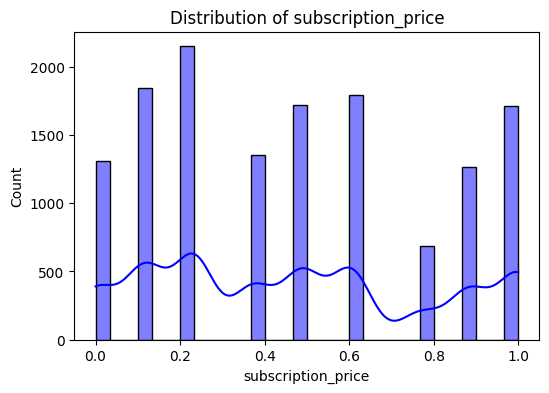

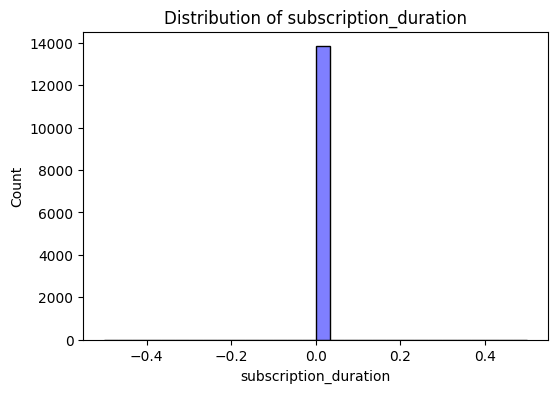

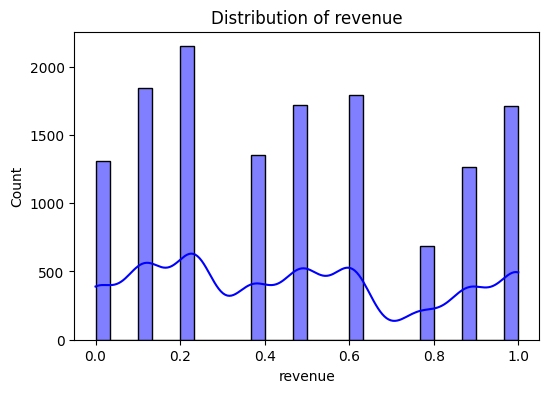

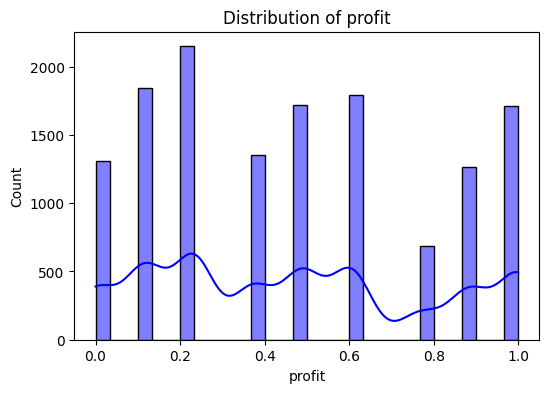

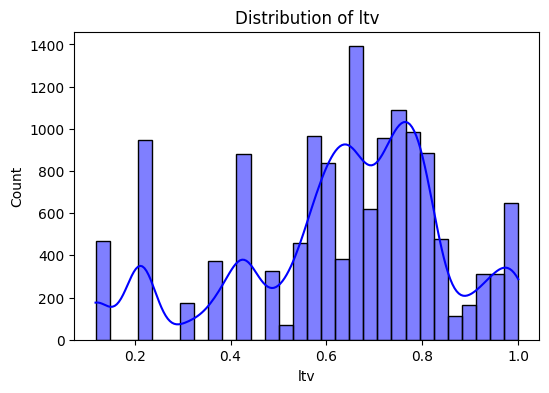

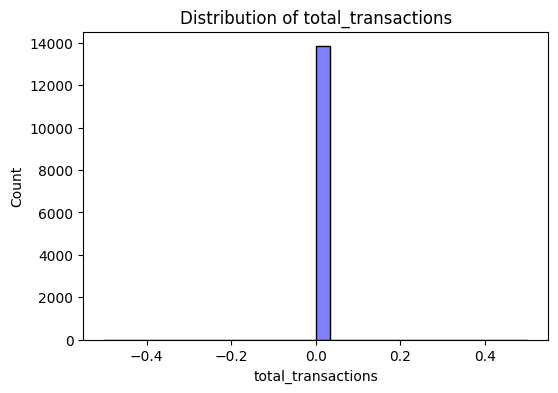


Summary Statistics:
                     transaction_date  subscription_price  \
count                          13837        13837.000000   
mean   2021-08-20 01:34:04.691768576            0.469911   
min              2020-01-01 00:00:00            0.000000   
25%              2021-01-01 00:00:00            0.232558   
50%              2021-10-01 00:00:00            0.488372   
75%              2022-05-01 00:00:00            0.767442   
max              2022-12-01 00:00:00            1.000000   
std                              NaN            0.323269   

                    signup_date_time               cancel_date_time  \
count                          13837                          13837   
mean   2017-04-05 19:09:02.060128512  2019-08-06 18:28:51.185697280   
min              2017-01-01 10:35:09            2017-01-13 12:14:39   
25%              2017-02-16 08:28:20     2019-08-04 11:52:38.500000   
50%              2017-04-04 09:43:59     2019-08-04 11:52:38.500000   
75%        

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Plot histograms for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color="blue")  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Display summary statistics
print("\nSummary Statistics:\n", df.describe())


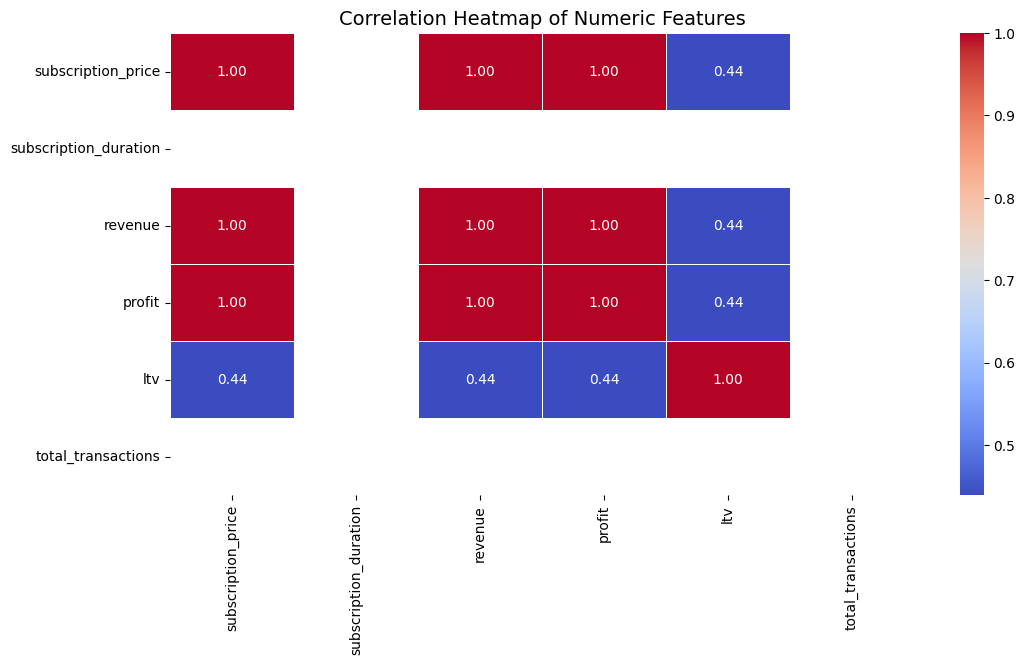

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


In [35]:
df.columns



Index(['customer_id', 'transaction_date', 'subscription_price',
       'signup_date_time', 'cancel_date_time', 'subscription_duration',
       'revenue', 'profit', 'ltv', 'total_transactions',
       'is_returning_customer', 'churn_status', 'transaction_year_month',
       'transaction_type_initial', 'transaction_type_reduction',
       'transaction_type_upgrade', 'subscription_type_max',
       'subscription_type_pro', 'customer_gender_male',
       'customer_gender_other', 'age_group_25-34', 'age_group_35-44',
       'age_group_45-54', 'age_group_55-65', 'customer_country_finland',
       'customer_country_norway', 'customer_country_sweden',
       'referral_type_display', 'referral_type_facebook',
       'referral_type_google ads', 'referral_type_organic search',
       'referral_type_paid search', 'referral_type_tv',
       'referral_type_unknown', 'product_prd_2', 'customer_region_finland',
       'customer_region_norway', 'customer_region_sweden'],
      dtype='object')

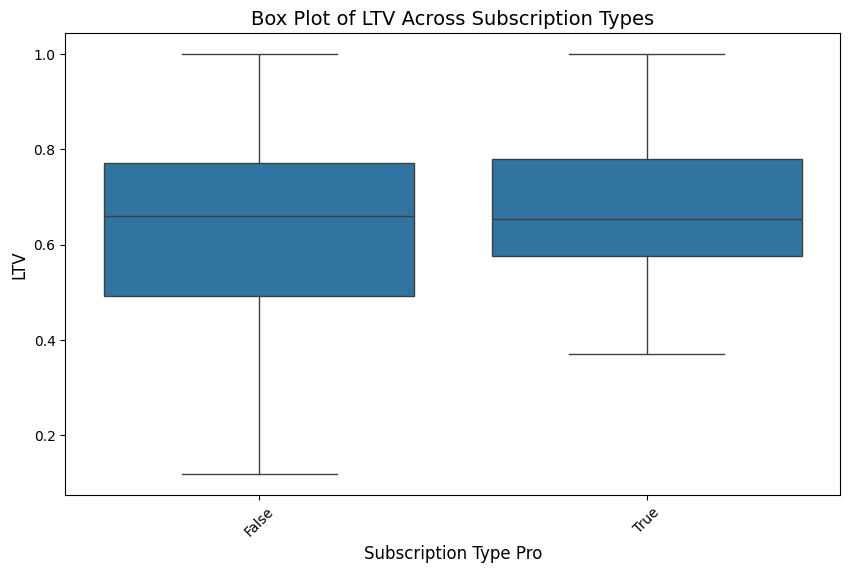

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='subscription_type_pro', y='ltv', data=df)

# Customize plot
plt.title("Box Plot of LTV Across Subscription Types", fontsize=14)
plt.xlabel("Subscription Type Pro", fontsize=12)
plt.ylabel("LTV", fontsize=12)
plt.xticks(rotation=45)
plt.show()
